# Data Analysis on LayOff Dataset-2023

## About Data

This dataset was scraped from Layoffs.fyi. Original dataset can be tracked at https://layoffs.fyi/
The time frame is from 2023-2021. 
Data cleanup is done using PySpark and EDA is done using Python to get the insights on Layoff trends during the Recession Period by different companies and Industires all over the world.

Explanation of selected columns:

Company - Name of the Company
Location - Location of the Company
Industry - Type of Industry the company is
Laid_Off_Count - Total count
Percentage - Percentage of layoff
Date - Date of layoff
Source - Data gathered from source
Funds_Raised - Total funds raised
Stage - Stage of the company
Date_Added - data added in database
Country - Country of company located
List_of_Employees_Laid_Off - link to g_docs of employee list




In [2]:
# Import necessary libraries
import findspark
findspark.init()
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.types import IntegerType
import pandas as pd
import numpy as np

In [3]:
#Create Spark Session
spark = SparkSession.builder.appName('layoff').getOrCreate()

#### Reading Dataset

In [4]:
df=spark.read.csv('/C:/Users/HP/Documents/Python Scripts/layoffs_data.csv',header=True,inferSchema=True)

#### Data Description

In [5]:
df.show()

+-------------+---------------+--------------+--------------+----------+----------+--------------------+------------+--------------+----------------+--------------+--------------------------+
|      Company|    Location_HQ|      Industry|Laid_Off_Count|Percentage|      Date|              Source|Funds_Raised|         Stage|      Date_Added|       Country|List_of_Employees_Laid_Off|
+-------------+---------------+--------------+--------------+----------+----------+--------------------+------------+--------------+----------------+--------------+--------------------------+
|Pie Insurance|Washington D.C.|       Finance|            63|      0.14|18-05-2023|https://media.pie...|       621.0|      Series D|18-05-2023 19:51| United States|                   Unknown|
|     Clearbit|    SF Bay Area|         Sales|          null|      null|18-05-2023|https://clearbit....|        17.0|      Series A|18-05-2023 16:31| United States|                   Unknown|
|     dbt Labs|   Philadelphia|         

In [6]:
df.head(1)

[Row(Company='Pie Insurance', Location_HQ='Washington D.C.', Industry='Finance', Laid_Off_Count=63, Percentage=0.14, Date='18-05-2023', Source='https://media.pieinsurance.com/press-releases/a-message-from-pies-ceo/', Funds_Raised=621.0, Stage='Series D', Date_Added='18-05-2023 19:51', Country='United States', List_of_Employees_Laid_Off='Unknown')]

In [7]:
df.columns

['Company',
 'Location_HQ',
 'Industry',
 'Laid_Off_Count',
 'Percentage',
 'Date',
 'Source',
 'Funds_Raised',
 'Stage',
 'Date_Added',
 'Country',
 'List_of_Employees_Laid_Off']

In [8]:
df.describe().show()

+-------+-------+-----------+---------+------------------+-------------------+----------+--------------------+----------------+--------+----------------+---------+--------------------------+
|summary|Company|Location_HQ| Industry|    Laid_Off_Count|         Percentage|      Date|              Source|    Funds_Raised|   Stage|      Date_Added|  Country|List_of_Employees_Laid_Off|
+-------+-------+-----------+---------+------------------+-------------------+----------+--------------------+----------------+--------+----------------+---------+--------------------------+
|  count|   2622|       2621|     2621|              1798|               1751|      2619|                2621|            2366|    2621|            2621|     2621|                      2620|
|   mean|   99.0|       null|     null|255.80867630700777| 0.2618375214163334|      null|                null|800.831485841082|    null|            null|     null|                      null|
| stddev|   null|       null|     null| 834.0

In [9]:
df.printSchema()

root
 |-- Company: string (nullable = true)
 |-- Location_HQ: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Laid_Off_Count: integer (nullable = true)
 |-- Percentage: double (nullable = true)
 |-- Date: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Funds_Raised: double (nullable = true)
 |-- Stage: string (nullable = true)
 |-- Date_Added: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- List_of_Employees_Laid_Off: string (nullable = true)



In [10]:
df_Columns=['Company',
 'Location_HQ',
 'Industry',
 'Laid_Off_Count',
 'Percentage',
 'Date',
 'Source',
 'Funds_Raised',
 'Stage',
 'Date_Added',
 'Country',
 'List_of_Employees_Laid_Off']

In [11]:
df.select([F.count(F.when((F.isnan(c)) | (F.col(c).isNull()) | (F.col(c) == '') | (F.col(c).contains('None')) | (F.col(c).contains('NULL')), c)).alias(c) for c in df_Columns]).show()

+-------+-----------+--------+--------------+----------+----+------+------------+-----+----------+-------+--------------------------+
|Company|Location_HQ|Industry|Laid_Off_Count|Percentage|Date|Source|Funds_Raised|Stage|Date_Added|Country|List_of_Employees_Laid_Off|
+-------+-----------+--------+--------------+----------+----+------+------------+-----+----------+-------+--------------------------+
|      0|          1|       1|           824|       871|   3|     1|         256|    1|         1|      1|                         2|
+-------+-----------+--------+--------------+----------+----+------+------------+-----+----------+-------+--------------------------+



In [12]:
df.distinct().count()

2622

#### Data Cleaning

In [13]:
df=df.na.fill(value=0, subset=['Percentage'])

In [14]:
df=df.na.fill(value=0, subset=['Laid_Off_Count'])

In [15]:
df=df.na.fill(value=0, subset=['Funds_Raised'])

In [16]:
updated_df=df.na.drop()

In [17]:
updated_df.select([F.count(F.when((F.isnan(c)) | (F.col(c).isNull()) | (F.col(c) == '') | (F.col(c).contains('None')) | (F.col(c).contains('NULL')), c)).alias(c) for c in df_Columns]).show()

+-------+-----------+--------+--------------+----------+----+------+------------+-----+----------+-------+--------------------------+
|Company|Location_HQ|Industry|Laid_Off_Count|Percentage|Date|Source|Funds_Raised|Stage|Date_Added|Country|List_of_Employees_Laid_Off|
+-------+-----------+--------+--------------+----------+----+------+------------+-----+----------+-------+--------------------------+
|      0|          0|       0|             0|         0|   0|     0|           0|    0|         0|      0|                         0|
+-------+-----------+--------+--------------+----------+----+------+------------+-----+----------+-------+--------------------------+



In [18]:
updated_df.describe().show()

+-------+-------+-----------+---------+------------------+-------------------+----------+--------------------+-----------------+--------+----------------+---------+--------------------------+
|summary|Company|Location_HQ| Industry|    Laid_Off_Count|         Percentage|      Date|              Source|     Funds_Raised|   Stage|      Date_Added|  Country|List_of_Employees_Laid_Off|
+-------+-------+-----------+---------+------------------+-------------------+----------+--------------------+-----------------+--------+----------------+---------+--------------------------+
|  count|   2618|       2618|     2618|              2618|               2618|      2618|                2618|             2618|    2618|            2618|     2618|                      2618|
|   mean|   99.0|       null|     null|175.44194041252865|0.17507161955691358|      null|                null|723.6162320473644|    null|            null|     null|                      null|
| stddev|   null|       null|     null| 

##### Dataset Modification

In [19]:
updated_df = updated_df.withColumn('Date', 
                   F.to_date(F.unix_timestamp(F.col('Date'), 'dd-MM-yyyy').cast("timestamp")))
updated_df.show()
updated_df.printSchema()

+-------------+---------------+--------------+--------------+----------+----------+--------------------+------------+--------------+----------------+--------------+--------------------------+
|      Company|    Location_HQ|      Industry|Laid_Off_Count|Percentage|      Date|              Source|Funds_Raised|         Stage|      Date_Added|       Country|List_of_Employees_Laid_Off|
+-------------+---------------+--------------+--------------+----------+----------+--------------------+------------+--------------+----------------+--------------+--------------------------+
|Pie Insurance|Washington D.C.|       Finance|            63|      0.14|2023-05-18|https://media.pie...|       621.0|      Series D|18-05-2023 19:51| United States|                   Unknown|
|     Clearbit|    SF Bay Area|         Sales|             0|       0.0|2023-05-18|https://clearbit....|        17.0|      Series A|18-05-2023 16:31| United States|                   Unknown|
|     dbt Labs|   Philadelphia|         

In [20]:
new_Df=updated_df.withColumn("Year",F.year(updated_df["Date"]))

In [21]:
new_Df.select("Year").distinct().show()

+----+
|Year|
+----+
|2023|
|2022|
|2020|
|2021|
+----+



In [22]:
new_df=new_Df.withColumn("Month",F.month(new_Df["Date"]))

In [23]:
final_df = new_df.withColumn('Quater', F.concat(F.col("Year"),F.lit("Q")))
final_df = final_df.withColumn('Quater', F.concat(F.col("Quater"),F.quarter("Date")))

In [24]:
final_df=final_df.withColumn("Laid_Off_Count",final_df["Laid_Off_Count"].cast(IntegerType()))

In [25]:
final_df.printSchema()

root
 |-- Company: string (nullable = true)
 |-- Location_HQ: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Laid_Off_Count: integer (nullable = true)
 |-- Percentage: double (nullable = false)
 |-- Date: date (nullable = true)
 |-- Source: string (nullable = true)
 |-- Funds_Raised: double (nullable = false)
 |-- Stage: string (nullable = true)
 |-- Date_Added: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- List_of_Employees_Laid_Off: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Quater: string (nullable = true)



In [26]:
final_df.show()

+-------------+---------------+--------------+--------------+----------+----------+--------------------+------------+--------------+----------------+--------------+--------------------------+----+-----+------+
|      Company|    Location_HQ|      Industry|Laid_Off_Count|Percentage|      Date|              Source|Funds_Raised|         Stage|      Date_Added|       Country|List_of_Employees_Laid_Off|Year|Month|Quater|
+-------------+---------------+--------------+--------------+----------+----------+--------------------+------------+--------------+----------------+--------------+--------------------------+----+-----+------+
|Pie Insurance|Washington D.C.|       Finance|            63|      0.14|2023-05-18|https://media.pie...|       621.0|      Series D|18-05-2023 19:51| United States|                   Unknown|2023|    5|2023Q2|
|     Clearbit|    SF Bay Area|         Sales|             0|       0.0|2023-05-18|https://clearbit....|        17.0|      Series A|18-05-2023 16:31| United Sta

# EDA

## Company V/s Laid off count

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import  plotly.graph_objects as go
import plotly.io as pio
import kaleido
pio.renderers.default = "png"

In [28]:
import  plotly.graph_objects as go

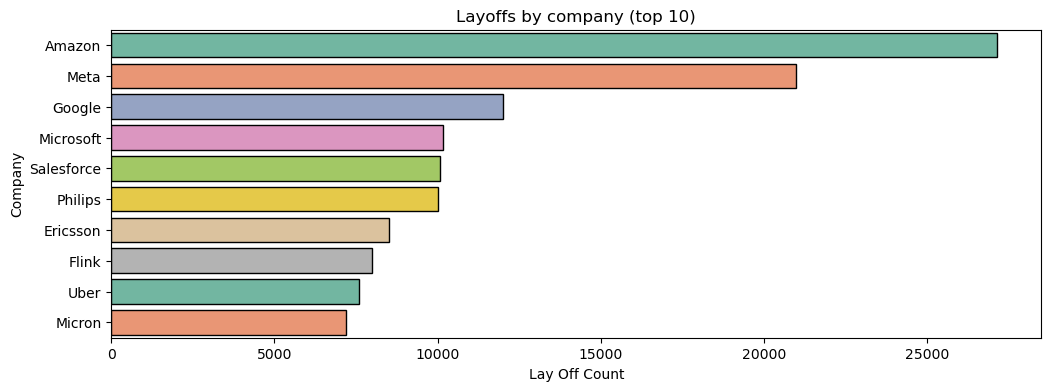

In [29]:
fig, ax = plt.subplots(figsize=(12,4))

grouped_data = final_df.groupby('Company').agg(F.sum('Laid_Off_Count'))
grouped_df =  grouped_data.toPandas()
sorted_df = grouped_df.sort_values(by='sum(Laid_Off_Count)', ascending=False)

ax = sns.barplot(data=sorted_df.head(10), 
                 x='sum(Laid_Off_Count)', y='Company'
                ,linewidth=1,edgecolor='black', errorbar=None, palette='Set2', ax=ax)
ax.set(title='Layoffs by company (top 10)', xlabel='Lay Off Count')

plt.show()

###### Amazon has highest layoff count
###### Micron has lowest layoff count

## Year V/s Layoff count

   Year  sum(Laid_Off_Count)
0  2023               197895
1  2022               164591
2  2020                80998
3  2021                15823


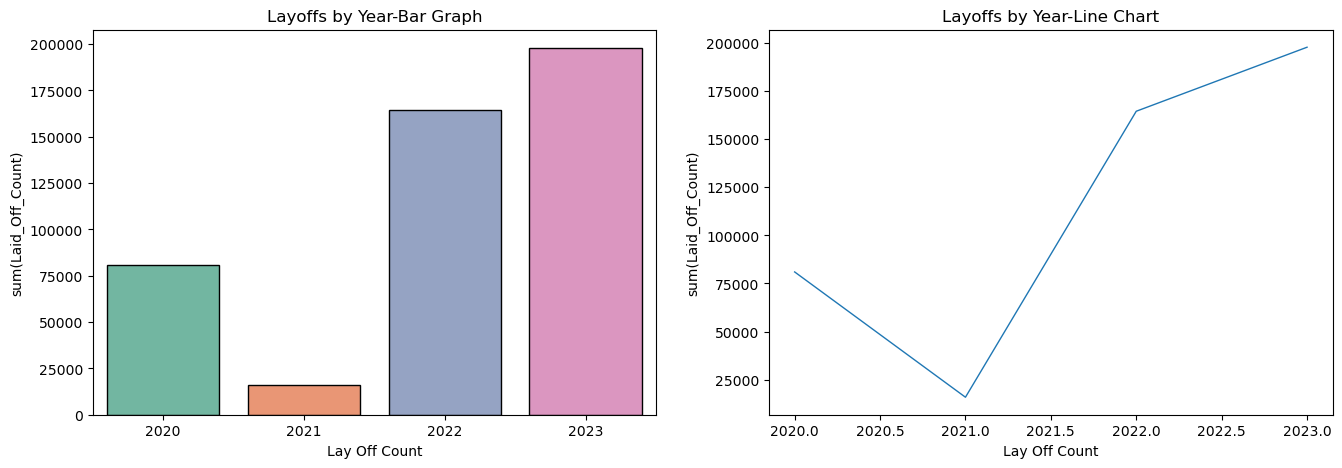

In [30]:
fig, axes= plt.subplots(1,2, figsize=(16,5))
grouped_data=final_df.groupby("Year").agg(F.sum("Laid_Off_Count"))
grouped_df=grouped_data.toPandas()
sorted_df=grouped_df.sort_values(by='sum(Laid_Off_Count)', ascending=False)
axes[0]=sns.barplot(data=sorted_df,x="Year",y="sum(Laid_Off_Count)",linewidth=1,edgecolor='black', errorbar=None, palette='Set2', ax=axes[0])
axes[0].set(title='Layoffs by Year-Bar Graph', xlabel='Lay Off Count')

axes[1]=sns.lineplot(data=sorted_df,x="Year",y="sum(Laid_Off_Count)",linewidth=1, ax=axes[1])
axes[1].set(title='Layoffs by Year-Line Chart', xlabel='Lay Off Count')
print(sorted_df)
plt.show()

#### 2023 year showed highest number of layoffs followed by 2022 there was a dip in the year 2021 but it again raised in 2020

## Quaterly Layoffs

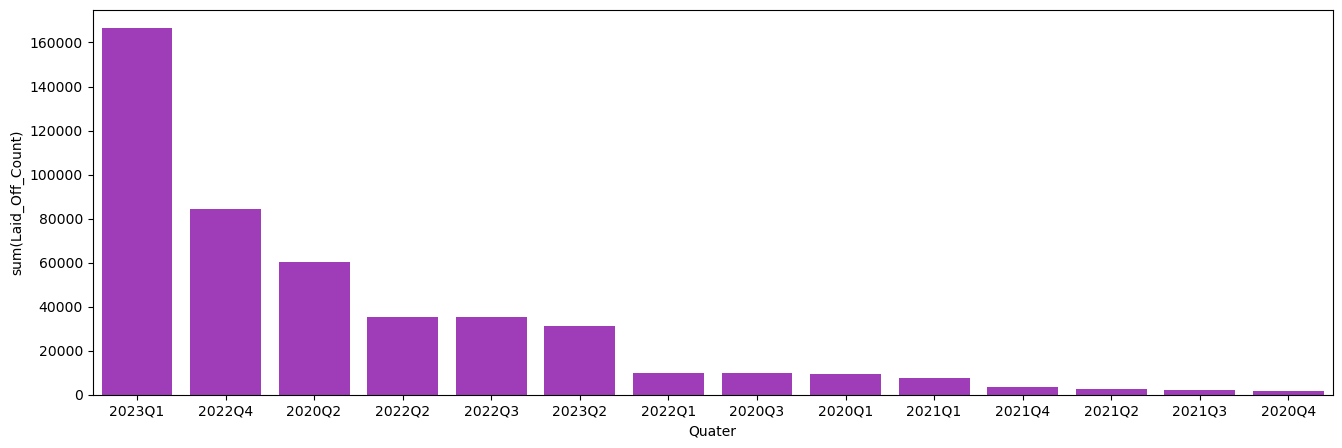

In [31]:
fig, axes=plt.subplots(figsize=(16,5))
groupded_data=final_df.groupby("Quater").agg(F.sum("Laid_Off_Count"))
group_df=groupded_data.toPandas()
sorted_data=group_df.sort_values(by="sum(Laid_Off_Count)",ascending=False)
axes=sns.barplot(data=sorted_data,x="Quater",y="sum(Laid_Off_Count)",errorbar=None, ax=axes, color='#ab29cc')
ax.set(title='Layoffs by Quater', xlabel='Quater', ylabel=' Layoff Count')
plt.show()

#### First Quater of 2023 shows the highest rate of LayOffs  

## Industry V/s Layoff

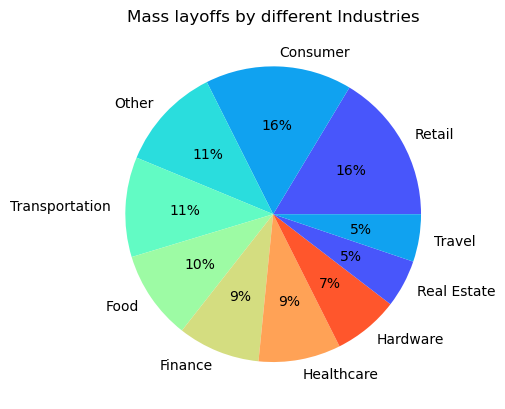

In [32]:
grouped_data= final_df.groupby("Industry").agg(F.sum("Laid_Off_Count"))
grouped_df=grouped_data.toPandas()
sorted_data=grouped_df.sort_values(by="sum(Laid_Off_Count)", ascending=False)
plot_data=sorted_data.head(10)
palette = sns.color_palette("rainbow", 8)
plt.pie(data=plot_data, x=plot_data['sum(Laid_Off_Count)'], labels=plot_data['Industry'], autopct='%.f%%', colors=palette)
plt.title("Mass layoffs by different Industries")

plt.show()

#### Retail and Consumer tops on the layoff count wherelese Travel and Real State shows least number of layoffs on top 10

## HQ_Location V/s Layoff

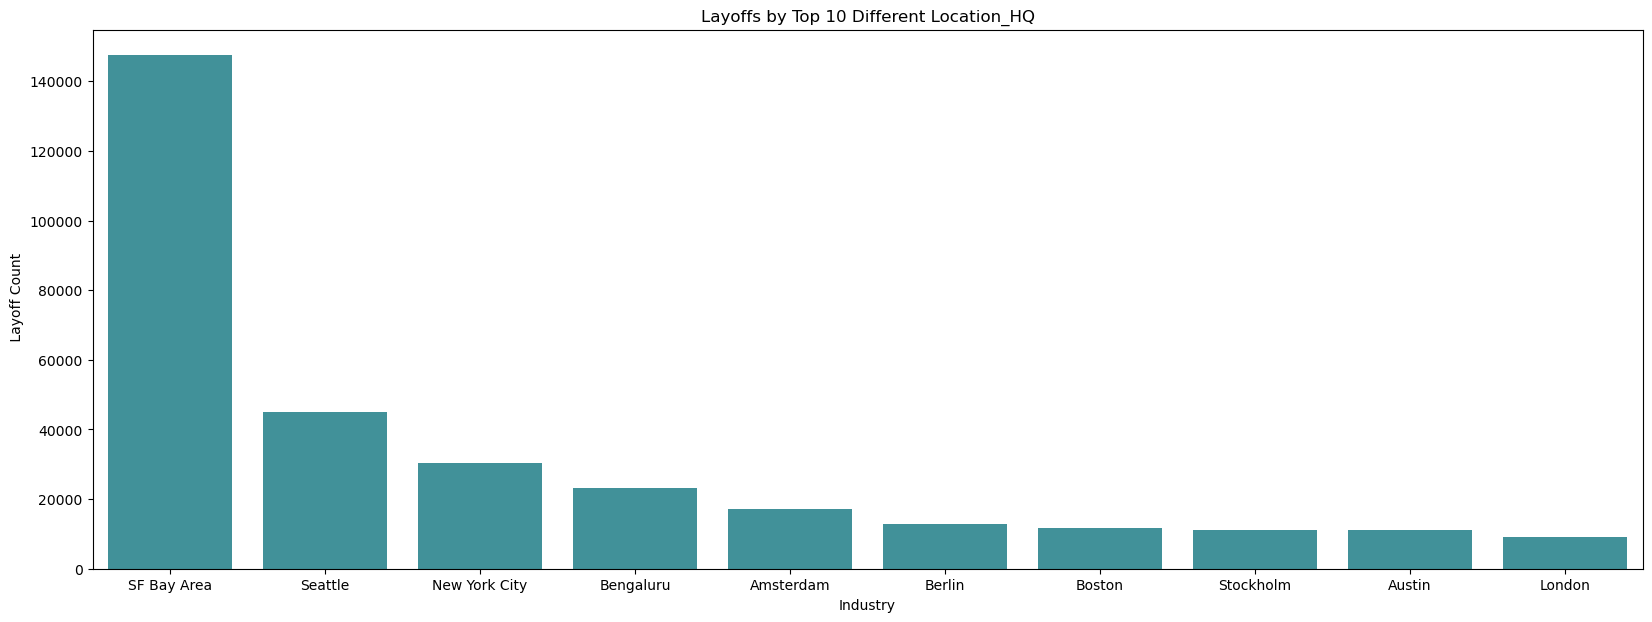

In [33]:
grouped_data= final_df.groupby("Location_HQ").agg(F.sum("Laid_Off_Count"))
grouped_df=grouped_data.toPandas()
sorted_data=grouped_df.sort_values(by="sum(Laid_Off_Count)", ascending=False)
plot_data=sorted_data.head(10)
fig, axes= plt.subplots(figsize=(20,7))
axes=sns.barplot(data=plot_data,x="Location_HQ",y="sum(Laid_Off_Count)",errorbar=None, ax=axes, color='#329da8')
axes.set(title='Layoffs by Top 10 Different Location_HQ', xlabel='Industry', ylabel=' Layoff Count')
plt.show()

#### SF Bay Area in Califonia, USA shows the highest number of LayOffs wherelese London reflects the least number of LayOffs

## Global Layoff

In [34]:
iso_alpha = pd.read_csv('C:/Users/HP/Downloads/f09c0f88344a7fcef373-2753c482ad091c54b1822288ad2e4811c021d8ec/wikipedia-iso-country-codes.csv')[['ISO 3166-2','English short name lower case']]
iso_alpha = iso_alpha.rename(columns = {'English short name lower case' : 'Country'})
grouped_data= final_df.groupby("Country").agg(F.sum("Laid_Off_Count"))
grouped_df=grouped_data.toPandas()
contry_wise_kill_count=grouped_df.sort_values(by="sum(Laid_Off_Count)", ascending=False)
contry_wise_kill_count = contry_wise_kill_count.merge(iso_alpha,on = 'Country')

In [35]:
contry_wise_kill_count

,Country,sum(Laid_Off_Count),ISO 3166-2
0,United States,309512,ISO 3166-2:US
1,India,39280,ISO 3166-2:IN
2,Netherlands,17220,ISO 3166-2:NL
3,Germany,16845,ISO 3166-2:DE
4,Sweden,11279,ISO 3166-2:SE
5,Brazil,10391,ISO 3166-2:BR
6,United Kingdom,9388,ISO 3166-2:GB
7,Canada,9060,ISO 3166-2:CA
8,China,6105,ISO 3166-2:CN
9,Singapore,5995,ISO 3166-2:SG


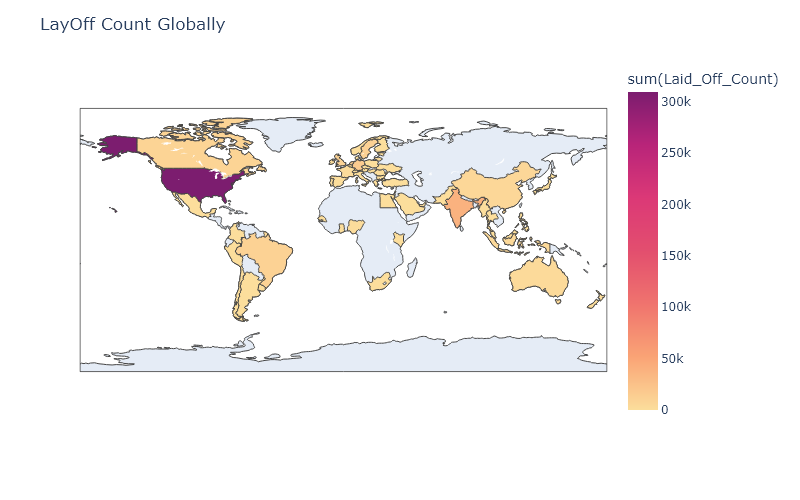

In [36]:
fig = px.choropleth(contry_wise_kill_count, locations="Country",locationmode='country names',
                    hover_name="Country", # column to add to hover information
                    color = 'sum(Laid_Off_Count)',
                    color_continuous_scale= 'sunsetdark',
                    )
fig.update_layout(title = 'LayOff Count Globally', width=800,
    height=500,)
fig.show()

#### USA shows the hghest rate of LayOffs